<a href="https://colab.research.google.com/github/Samoed/CourseWork2/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Samoed/CourseWork2/main/data/people.csv?token=AITWEH5GXVUK64KE7RO36DTAKIONO
!wget https://raw.githubusercontent.com/Samoed/CourseWork2/main/data/vkrTextShort.csv?token=AITWEH2PP5HHIZ6KXE3E6JTAKIONK

--2021-03-10 15:15:06--  https://raw.githubusercontent.com/Samoed/CourseWork2/main/data/people.csv?token=AITWEH5GXVUK64KE7RO36DTAKIONO
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30447 (30K) [text/plain]
Saving to: ‘people.csv?token=AITWEH5GXVUK64KE7RO36DTAKIONO’

people.csv?token=AI 100%[===================>]  29.73K  --.-KB/s    in 0.001s  

2021-03-10 15:15:06 (30.5 MB/s) - ‘people.csv?token=AITWEH5GXVUK64KE7RO36DTAKIONO’ saved [30447/30447]

--2021-03-10 15:15:06--  https://raw.githubusercontent.com/Samoed/CourseWork2/main/data/vkrTextShort.csv?token=AITWEH2PP5HHIZ6KXE3E6JTAKIONK
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.github

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
people = pd.read_csv('/content/people.csv?token=AITWEH5GXVUK64KE7RO36DTAKIONO')
vkr = pd.read_csv('/content/vkrTextShort.csv?token=AITWEH2PP5HHIZ6KXE3E6JTAKIONK')
vkr.drop('Unnamed: 0',axis=1, inplace=True)
people.drop('Unnamed: 0',axis=1, inplace=True)

In [8]:
people.head()

,name,link
0,Абашева Александра Сергеевна,https://www.hse.ru/org/persons/485801
1,Авраменко Иван Александрович,https://www.hse.ru/org/persons/99247481
2,Агаркова Наталия Владиславовна,https://www.hse.ru/org/persons/28123133
3,Айхбергер Юрген Томас Германн,https://www.hse.ru/org/persons/359359486
4,Александров Владимир Анатольевич,https://www.hse.ru/org/persons/420359428


In [9]:
vkr.head()

,link_vkr,name_vkr,name_student,name_prof,campus,programm,grade,year,link_file,shortText
0,https://www.hse.ru/edu/vkr/219524501,Оценка стоимости компании,Дроздова Ирина Валерьевна,Абашева Александра Сергеевна,Вечерне-заочный факультет экономики и управле...,Экономика (в) (Бакалавриат),-1,2018,NaN,NaN
1,https://www.hse.ru/edu/vkr/219524122,Оценка эффективности инвестиционного проекта,Стерледева Наталья Владимировна,Абашева Александра Сергеевна,Вечерне-заочный факультет экономики и управле...,Экономика (в) (Бакалавриат),7,2018,http://lms.hse.ru/ap_service.php?getwork=1&gui...,irr проект превышать средневзвешенный стоимост...
2,https://www.hse.ru/edu/vkr/153009903,Разработка системы управления знаниями в орган...,Беленова Анастасия Александровна,Аленина Карина Анатольевна,Факультет менеджмента (Пермь),Менеджмент (Бакалавриат),-1,2015,NaN,NaN
3,https://www.hse.ru/edu/vkr/153009689,Брендинг инновационного продукта,Воронков Кирилл Евгеньевич,Аленина Карина Анатольевна,Факультет менеджмента (Пермь),Менеджмент (Бакалавриат),-1,2015,NaN,NaN
4,https://www.hse.ru/edu/vkr/153009541,Стратегия инновационного развития бизнеса в ин...,Бадягина Мария Германовна,Аленина Карина Анатольевна,Факультет менеджмента (Пермь),Менеджмент (Бакалавриат),-1,2015,NaN,NaN


In [43]:
vkr.groupby("name_prof")["shortText"].head()

0                                                     NaN
1       irr проект превышать средневзвешенный стоимост...
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
1686                                                  NaN
1687                                                  NaN
1688    профессор ____________________ л. кафедра инфо...
1689                                                  NaN
1690    ясницкий пермь, год аннотация автор работа: ко...
Name: shortText, Length: 327, dtype: object

In [49]:
clearVkr = vkr.loc[vkr["shortText"].dropna().index, :]

In [51]:
texts = clearVkr.groupby("name_prof")['shortText'].apply(lambda tags: ' '.join(tags))

In [55]:
texts[0]

'irr проект превышать средневзвешенный стоимость капитал wacc, это говорить эффективность проект. целое, проект являться эффективный финансовый реализовать. оценка эффективность проект…………………………...……. .. оценка риск метод анализ чувствительность ……….… цель работа являться оценка эффективность инвестиционный проект. приложение вынести расчетный таблица. следующий блок, который предлагать рассматривать остервальдера «основной направление деятельность». длительность шаг расчет измеряться год доля год. необходимо, шаг соответствовать продолжительность важный фаза жизненный цикл проект. срок окупаемость — показатель индивидуальный. pi profitability index индекс отдача инвестиция. метод дельфи – метод сбор информация, использовать достижение консенсус эксперт какомулибо вопрос. получать, число, экспертный оценка. часть становиться постоянный клиент, это гарантировать успех. здание санузел, два душевой мужской женский два минисауна, два комната переодевание. также комната персонал, кафе комна

In [65]:
vocab = []
for text in texts:
    for word in text.split():
        vocab.append(word)

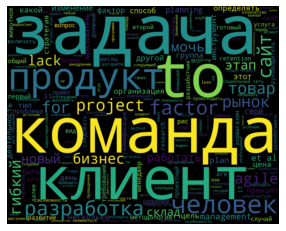

In [83]:
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000, height=800, stopwords=pd.Series(vocab).value_counts().keys()[:40]).generate(texts[13])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
arr = pd.Series(vocab).value_counts()

In [82]:
arr["проект"]

326

In [59]:
wordcloud.to_file('test.png')